In [1]:
import pandas as pd
import numpy as np


In [2]:
start = ['2019-12-30', '2021-1-4', '2022-01-03']
nrows = [53*7, 52*7, 52*7]
trend = [0.9, 1.0, 1.1]

np.random.seed(27)
f1 = lambda x: 0.000016*(x-170)**3-0.0003*(x-400)**2-0.5*x+250 
f2 = lambda x: 0.000012*(x-180)**3-0.0006*(x-200)**2-0.26*x+270

s1 = pd.Series(data=np.random.normal(loc=120*trend[0], scale=20*trend[0], size=nrows[0]), index=pd.date_range(start=start[0], periods=nrows[0]), name='skill A').append(
     pd.Series(data=np.random.normal(loc=120*trend[1], scale=20*trend[1], size=nrows[1]), index=pd.date_range(start=start[1], periods=nrows[1]), name='skill A')).append(
     pd.Series(data=np.random.normal(loc=120*trend[2], scale=20*trend[2], size=nrows[2]), index=pd.date_range(start=start[2], periods=nrows[2]), name='skill A'))
s2 = pd.Series(data=np.random.weibull(7*trend[0], nrows[0]) * 100*trend[0], index=pd.date_range(start=start[0], periods=nrows[0]), name='skill B').append(
     pd.Series(data=np.random.weibull(7*trend[1], nrows[1]) * 100*trend[1], index=pd.date_range(start=start[1], periods=nrows[1]), name='skill B')).append(
     pd.Series(data=np.random.weibull(7*trend[2], nrows[2]) * 100*trend[2], index=pd.date_range(start=start[2], periods=nrows[2]), name='skill B'))
s3 = pd.Series(data=np.array(list(map(f1, np.arange(0, nrows[0])))) + (np.random.weibull(7*trend[0], nrows[0]) * 100*trend[0]), index=pd.date_range(start=start[0], periods=nrows[0]), name='skill C').append(
     pd.Series(data=np.array(list(map(f1, np.arange(0, nrows[1])))) + (np.random.weibull(7*trend[1], nrows[1]) * 100*trend[1]), index=pd.date_range(start=start[1], periods=nrows[1]), name='skill C')).append(
     pd.Series(data=np.array(list(map(f1, np.arange(0, nrows[2])))) + (np.random.weibull(7*trend[2], nrows[2]) * 100*trend[2]), index=pd.date_range(start=start[2], periods=nrows[2]), name='skill C'))
s4 = pd.Series(data=np.array(list(map(f2, np.arange(0, nrows[0])))) + (np.random.normal(loc=120*trend[0], scale=20*trend[0], size=nrows[0])), index=pd.date_range(start=start[0], periods=nrows[0]), name='skill D').append(
     pd.Series(data=np.array(list(map(f2, np.arange(0, nrows[1])))) + (np.random.normal(loc=120*trend[1], scale=20*trend[1], size=nrows[1])), index=pd.date_range(start=start[1], periods=nrows[1]), name='skill D')).append(
     pd.Series(data=np.array(list(map(f2, np.arange(0, nrows[2])))) + (np.random.normal(loc=120*trend[2], scale=20*trend[2], size=nrows[2])), index=pd.date_range(start=start[2], periods=nrows[2]), name='skill D'))

frame = pd.concat([s1, s2, s3, s4], axis=1)

# week & month pattern
w = pd.Series(data=[1.04, 1.29, 0.91, 0.87, 1.21, 0.32, 0.05] * int(sum(nrows) / 7), index=pd.date_range(start=start[0], periods=sum(nrows)))
m = pd.Series(data=s1.index.day.map({27: 1.03, 28: 1.06, 29: 1.11, 30: 1.16, 31: 1.09}).fillna(1), index=pd.date_range(start=start[0], periods=sum(nrows)))
frame = frame.multiply(w, axis=0).multiply(m, axis=0)

#break the frame
for col in frame.columns:
    frame.at[frame.sample(frac=0.05).index, col] = np.nan # break the frame

In [6]:
frame.to_pickle('../data/frame.pkl')

In [15]:
index = frame.dropna().index
min(index[1:]-index[:-1])

Timedelta('1 days 00:00:00')

<AxesSubplot:>

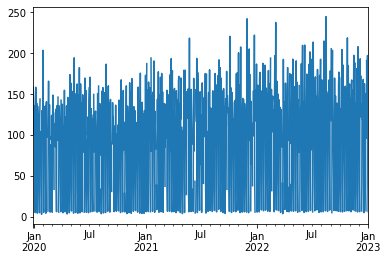

In [5]:
frame['skill A'].plot()